In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img

Preparing Dataset

In [2]:
print(os.listdir('../input/balls-image-classification/test'))

['buckeyballs', 'brass', 'screwballs', 'medicine ball', 'puffballs', 'bowling ball', 'beachballs', 'volley ball', 'football', 'meat ball', 'tennis ball', 'pokeman balls', 'baseball', 'water polo ball', 'tether ball', 'billiard ball', 'golf ball', 'marble', 'cannon ball', 'soccer ball', 'basketball', 'wiffle ball', 'eyeballs', 'wrecking ball', 'paint balls', 'cricket ball']


In [3]:
label_code = {'buckeyballs':0, 'brass':1, 'screwballs':2, 'medicine ball':3, 'puffballs':4, 'bowling ball':5, 'beachballs':6, 'volley ball':7, 'football':8, 'meat ball':9, 'tennis ball':10, 'pokeman balls':11, 'baseball':12, 'water polo ball':13, 'tether ball':14, 'billiard ball':15, 'golf ball':16, 'marble':17, 'cannon ball':18, 'soccer ball':19, 'basketball':20, 'wiffle ball':21, 'eyeballs':22, 'wrecking ball':23, 'paint balls':24, 'cricket ball':25}
label_decode = ['buckeyballs', 'brass', 'screwballs', 'medicine ball', 'puffballs', 'bowling ball', 'beachballs', 'volley ball', 'football', 'meat ball', 'tennis ball', 'pokeman balls', 'baseball', 'water polo ball', 'tether ball', 'billiard ball', 'golf ball', 'marble', 'cannon ball', 'soccer ball', 'basketball', 'wiffle ball', 'eyeballs', 'wrecking ball', 'paint balls', 'cricket ball']

files counting

In [4]:
i = 0
for dirname, _, filenames in os.walk('../input/balls-image-classification/train'):
    for filename in filenames:
        i += 1
print(i)

3051


In [5]:
i = 0
for dirname, _, filenames in os.walk('../input/balls-image-classification/valid'):
    for filename in filenames:
        i += 1
print(i)

130


create numpy array for x and y

In [7]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
IMG_CHANNELS = 3
SAMPLES = 3051  #train
SAMPLES2 = 130  #validation
CATEGORIES = 26 # 1 for binary classification problem

X_train = np.zeros((SAMPLES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       
y_train = np.zeros((SAMPLES, CATEGORIES), dtype='int32')         

X_val = np.zeros((SAMPLES2, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       
y_val = np.zeros((SAMPLES2, CATEGORIES), dtype='int32') 

load data in array

In [8]:
from tensorflow.keras.applications.xception import preprocess_input

In [9]:
i = 0
for dirname, _, filenames in os.walk('../input/balls-image-classification/train'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_train[i,:,:,:3]  = _img
        _label = dirname.split('/')[-1]
        _index = label_code[_label]
        y_train[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 150/150 [00:00<00:00, 216.92it/s]


In [10]:
i = 0
for dirname, _, filenames in os.walk('../input/balls-image-classification/valid'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_val[i,:,:,:3]  = _img
        _label = dirname.split('/')[-1]
        _index = label_code[_label]
        y_val[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 5/5 [00:00<00:00, 248.78it/s]


In [11]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=12)
X_val, y_val = shuffle(X_val, y_val, random_state=12)

Model Setup

In [12]:
base_model = tf.keras.applications.Xception(weights='imagenet',input_shape=(150, 150, 3),include_top=False)

2022-03-15 14:16:55.735693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 14:16:55.839947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 14:16:55.840652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 14:16:55.841827: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step


In [13]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [14]:
base_model.trainable = True           #freeze the base model

In [15]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(26, activation = 'softmax' )(x)
model = tf.keras.Model(inputs, outputs)        #Create a new model on top

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1690      
Total params: 20,994,306
Trainable params: 20,939,778
Non-trainable params: 54,528
____________________________________________

Squential models

In [19]:
model2 = tf.keras.models.Sequential()

base_model = tf.keras.applications.mobilenet.MobileNet(weights='imagenet',input_shape=(150, 150, 3),include_top=False)

for layer in base_model.layers[:25]: 
    model2.add(layer)

In [20]:
model2.trainable = True
for layer in model2.layers[:-8]:
    layer.trainable= False

In [21]:
model2.summary(0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 75, 75, 32)        0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 75, 75, 64)       

Trainning and Evaluation

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
hist = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data=(X_val,y_val), epochs=20, verbose=1, shuffle= True)

2022-03-15 14:24:59.576102: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-03-15 14:25:03.225801: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


96/96 [==============================] - 28s 195ms/step - loss: 2.9019 - accuracy: 0.2419 - val_loss: 3.2600 - val_accuracy: 0.0462
Epoch 2/20
96/96 [==============================] - 17s 180ms/step - loss: 1.9716 - accuracy: 0.6103 - val_loss: 3.1554 - val_accuracy: 0.1000
Epoch 3/20
96/96 [==============================] - 17s 180ms/step - loss: 1.1988 - accuracy: 0.7879 - val_loss: 2.3615 - val_accuracy: 0.5692
Epoch 4/20
96/96 [==============================] - 17s 180ms/step - loss: 0.7583 - accuracy: 0.8705 - val_loss: 1.3130 - val_accuracy: 0.7846
Epoch 5/20
96/96 [==============================] - 17s 182ms/step - loss: 0.4694 - accuracy: 0.9253 - val_loss: 0.6877 - val_accuracy: 0.8692
Epoch 6/20
96/96 [==============================] - 17s 180ms/step - loss: 0.3322 - accuracy: 0.9400 - val_loss: 0.3538 - val_accuracy: 0.9077
Epoch 7/20
96/96 [==============================] - 17s 180ms/step - loss: 0.2517 - accuracy: 0.9551 - val_loss: 0.2334 - val_accuracy: 0.9538
Epoch 8/20

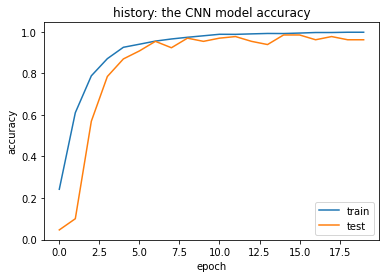

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

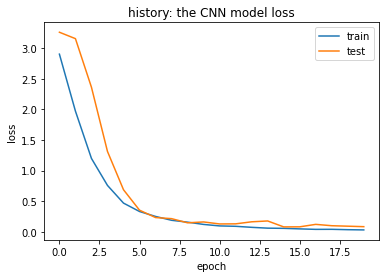

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Prediction on single image

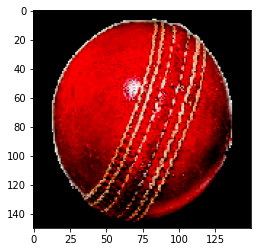

In [27]:
path2 = '../input/balls-image-classification/test/cricket ball/4.jpg'
img = load_img(path2, color_mode = "rgb", target_size=(150, 150))  #h, w
img = np.array(img, dtype = 'float32')
img = preprocess_input(img)
plt.imshow(img)
img = img.reshape(1,150,150,3)

In [28]:
y1 = model.predict(img)

In [29]:
print(label_decode[np.argmax(y1)])

cricket ball
